In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('/content/gdrive/MyDrive/SMA Practice/Dataset/hashtag_analysis.csv')
df.head()

,user_id,user_group,hashtags
0,1,Group A,#food #cooking #recipe
1,2,Group A,#food #recipe #yum
2,3,Group B,#travel #adventure #explore
3,4,Group B,#travel #vacation #beach
4,5,Group C,#fitness #workout #health


In [7]:
hashtags_by_group = df.groupby(['user_group', 'hashtags']).size().reset_index(name='count')
hashtags_by_group

,user_group,hashtags,count
0,Group A,#food #cooking #recipe,1
1,Group A,#food #pizza #cheese,1
2,Group A,#food #recipe #yum,1
3,Group B,#travel #adventure #explore,1
4,Group B,#travel #nature #hiking,1
5,Group B,#travel #vacation #beach,1
6,Group C,#fitness #motivation #gym,1
7,Group C,#fitness #nutrition #diet,1
8,Group C,#fitness #workout #health,1
9,Group D,#music #band #album,1


In [9]:
# Sort the data by count in descending order
sorted_data = hashtags_by_group.sort_values(by=['user_group', 'count'], ascending=[True, False])
sorted_data

,user_group,hashtags,count
0,Group A,#food #cooking #recipe,1
1,Group A,#food #pizza #cheese,1
2,Group A,#food #recipe #yum,1
3,Group B,#travel #adventure #explore,1
4,Group B,#travel #nature #hiking,1
5,Group B,#travel #vacation #beach,1
6,Group C,#fitness #motivation #gym,1
7,Group C,#fitness #nutrition #diet,1
8,Group C,#fitness #workout #health,1
9,Group D,#music #band #album,1


In [10]:
for group in sorted_data['user_group'].unique():
    top_3 = sorted_data[sorted_data['user_group'] == group].head(3)
    print('Top 3 hashtags for {}: {}'.format(group, list(top_3['hashtags'])))

Top 3 hashtags for Group A: ['#food #cooking #recipe', '#food #pizza #cheese', '#food #recipe #yum']
Top 3 hashtags for Group B: ['#travel #adventure #explore', '#travel #nature #hiking', '#travel #vacation #beach']
Top 3 hashtags for Group C: ['#fitness #motivation #gym', '#fitness #nutrition #diet', '#fitness #workout #health']
Top 3 hashtags for Group D: ['#music #band #album', '#music #concert #livemusic', '#music #playlist #spotify']
Top 3 hashtags for Group E: ['#art #painting #gallery', '#art #sculpture #modernart', '#art #sketch #drawing']


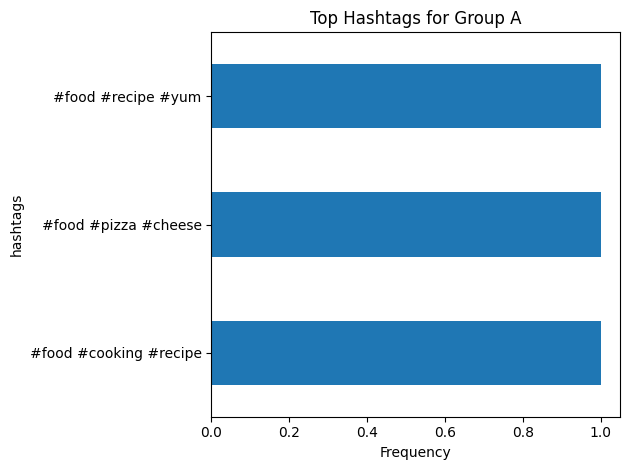

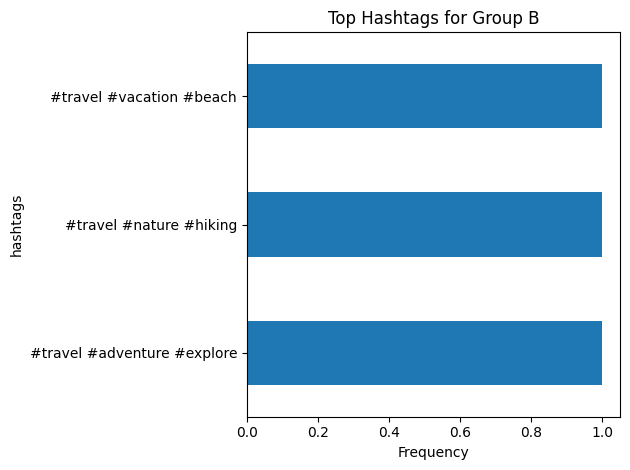

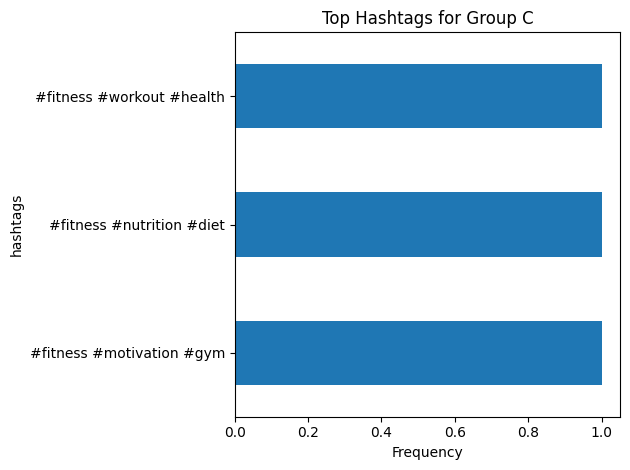

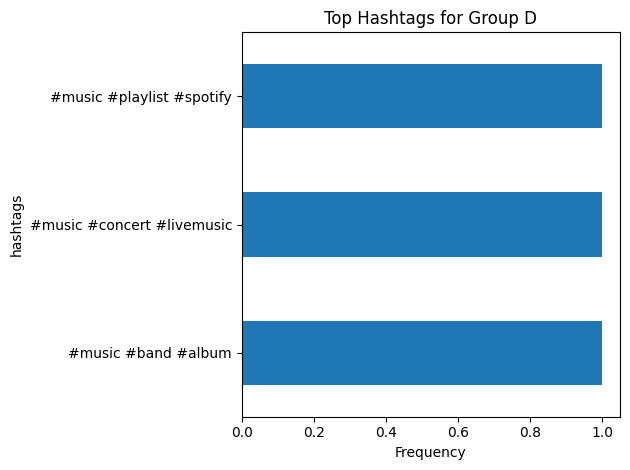

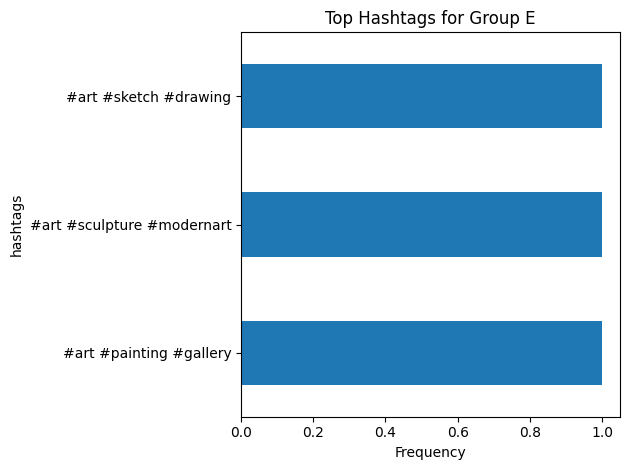

In [8]:
for group in df['user_group'].unique():
  group_data = hashtags_by_group[hashtags_by_group['user_group'] == group].sort_values('count', ascending=False).head(10)
  ax = group_data.plot(kind='barh', x='hashtags', y='count', legend=False, title=f'Top Hashtags for {group}')
  ax.set_xlabel('Frequency')
  plt.tight_layout()
  plt.show()

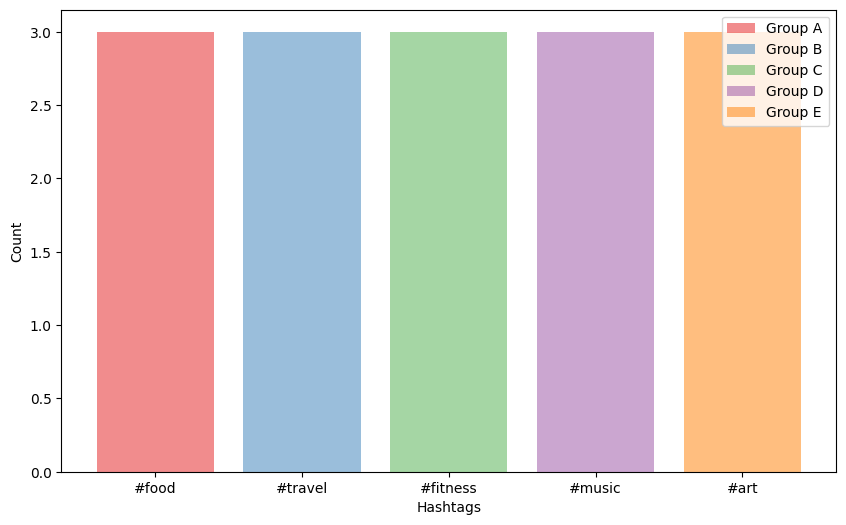

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# create the DataFrame
data = {'user_id': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
        'user_group': ['Group A', 'Group A', 'Group B', 'Group B', 'Group C', 'Group C', 'Group D', 'Group D', 'Group E', 'Group E', 'Group A', 'Group B', 'Group C', 'Group D', 'Group E'],
        'hashtags': ['#food #cooking #recipe', '#food #recipe #yum', '#travel #adventure #explore', '#travel #vacation #beach', '#fitness #workout #health', '#fitness #motivation #gym', '#music #concert #livemusic', '#music #playlist #spotify', '#art #painting #gallery', '#art #sketch #drawing', '#food #pizza #cheese', '#travel #nature #hiking', '#fitness #nutrition #diet', '#music #band #album', '#art #sculpture #modernart']}
df = pd.DataFrame(data)

# split the hashtags into separate columns
df[['hashtag_1', 'hashtag_2', 'hashtag_3']] = df['hashtags'].str.split(' ', expand=True)
df

# get individual hashtag count for each group
group_hashtags = df.groupby(['user_group', 'hashtag_1'])['user_id'].count().reset_index(name='Count')

# plot the hashtag count for each group
fig, ax = plt.subplots(figsize=(10,6))
for i, group in enumerate(group_hashtags['user_group'].unique()):
    df_temp = group_hashtags[group_hashtags['user_group'] == group].sort_values('Count', ascending=False)
    ax.bar(df_temp['hashtag_1'], df_temp['Count'], label=group, alpha=0.5, color=plt.cm.Set1(i))
ax.set_xlabel('Hashtags')
ax.set_ylabel('Count')
ax.legend()
plt.show()

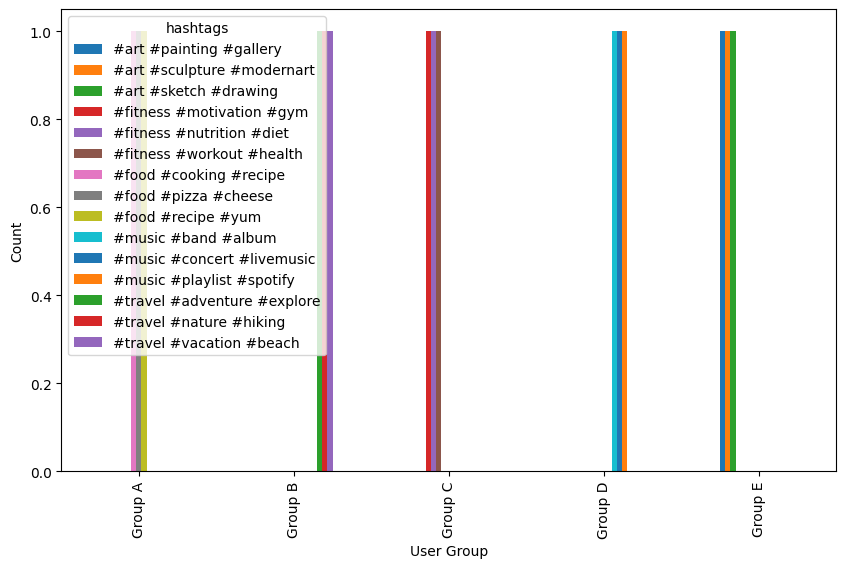

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Create the dataframe
data = {'user_id': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],
        'user_group': ['Group A', 'Group A', 'Group B', 'Group B', 'Group C', 'Group C', 'Group D', 'Group D', 'Group E', 'Group E', 'Group A', 'Group B', 'Group C', 'Group D', 'Group E'],
        'hashtags': ['#food #cooking #recipe', '#food #recipe #yum', '#travel #adventure #explore', '#travel #vacation #beach', '#fitness #workout #health', '#fitness #motivation #gym', '#music #concert #livemusic', '#music #playlist #spotify', '#art #painting #gallery', '#art #sketch #drawing', '#food #pizza #cheese', '#travel #nature #hiking', '#fitness #nutrition #diet', '#music #band #album', '#art #sculpture #modernart']}
df = pd.DataFrame(data)

# Split the hashtags into separate rows
df = df.explode('hashtags')

# Remove empty strings and leading/trailing whitespace
df['hashtags'] = df['hashtags'].str.strip().replace('', pd.NA).dropna()

# Group by user group and hashtag
grouped_df = df.groupby(['user_group', 'hashtags']).size().reset_index(name='count')

# Pivot the data to get each hashtag as a separate column
pivoted_df = grouped_df.pivot(index='user_group', columns='hashtags', values='count')

# Plot the data as a bar chart
ax = pivoted_df.plot(kind='bar', figsize=(10, 6))
ax.set_ylabel('Count')
ax.set_xlabel('User Group')
plt.show()

In [16]:
import pandas as pd

# Create a sample dataframe
data = {'user_id': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
        'user_group': ['Group A', 'Group A', 'Group B', 'Group B', 'Group C', 'Group C',
                       'Group D', 'Group D', 'Group E', 'Group E', 'Group A', 'Group B',
                       'Group C', 'Group D', 'Group E'],
        'hashtags': ['#food #cooking #recipe', '#food #recipe #yum', '#travel #adventure #explore',
                     '#travel #vacation #beach', '#fitness #workout #health', '#fitness #motivation #gym',
                     '#music #concert #livemusic', '#music #playlist #spotify', '#art #painting #gallery',
                     '#art #sketch #drawing', '#food #pizza #cheese', '#travel #nature #hiking',
                     '#fitness #nutrition #diet', '#music #band #album', '#art #sculpture #modernart']}
df = pd.DataFrame(data)

# Split the hashtags column by delimiter and stack the resulting series
hashtags_series = df['hashtags'].str.split(expand=True).stack()

# Drop the original index level (the row index)
hashtags_series.index = hashtags_series.index.droplevel(level=1)

grouped = df.groupby('user_group')['hashtags'].apply(lambda x: pd.Series(x.str.split().sum())).reset_index()

# Convert the series back to a dataframe and rename the column
df2 = pd.DataFrame(hashtags_series, columns=['hashtag'])

# Remove empty strings and leading/trailing whitespace
df2['hashtag'] = df2['hashtag'].str.strip().replace('', pd.NA).dropna()

# Group by user group and hashtag, then count the frequency of each hashtag within each group
group_hashtag_counts = df2.groupby(['hashtag', 'user_group']).size().reset_index(name='count')

# Rank the hashtags within each group based on count
group_hashtag_counts['rank'] = group_hashtag_counts.groupby('user_group')['count'].rank(ascending=False)

# Filter for the top two hashtags in each group
top_hashtags = group_hashtag_counts[group_hashtag_counts['rank'] <= 2]

# Pivot the table to get a column for each user group and the top two hashtags for each group
top_hashtags_pivot = top_hashtags.pivot(index='rank', columns='user_group', values='hashtag')

print(top_hashtags_pivot)

KeyError: ignored